# Intro to ensemble methods

**Ensemble methods** are supervized learning models which combine the predictions of multiple smaller models to improve predictive power and generalization.

The smaller models that combine to make the ensemble model are referred to as **base models**. Ensemble methods often result in significantly higher performance than any of the individual base models could achieve.

Because your overall model is singular, comprised of multiple components represented by smaller models, we avoid the issue of multiple comparisons.

## When to use ensembles

Use cases in which the highest performance is desired at the expense of interpretability...

    - Medical diagnoses
    - Predicting disease outbreak, natrual disasters
    - Stock market predictions
    - AI

## Two families of ensemble methods

---

**BAGGING**

Several estimators are built independently on subsets of the data and their predictions are averaged. Typically the combined estimator is usually better than any of the single base estimator due to **reduction in variance is reduced that exceeds increase in bias.**

    ex: Random Forests

---

**BOOSTING**

Base estimators are built sequentially. Each subsequent estimator attempts to reduce the bias of the combined estimator. The iterative base estimators focus on the weaknesses of the prior estimators; in essence several weak models "team up" to produce a powerful ensemble model. (We will discuss these later this week.)

    ex: Gradient Boosted Trees, AdaBoost

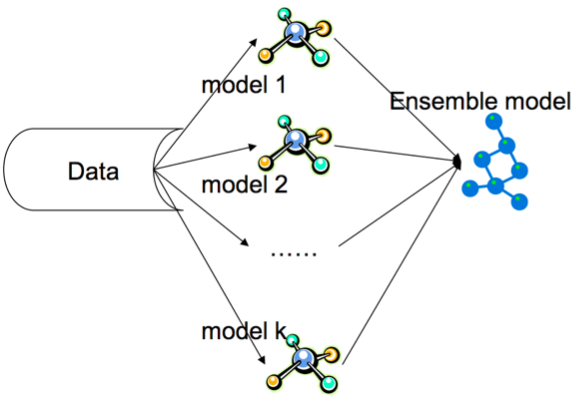

In [1]:
from IPython.display import Image
Image(filename='../assets/images/Ensemble.png') 

## Potential deficiencies of base models

There are three categories of weaknesses in which base models can fail or produce poor performance:

1. Statistical problems
2. Computational problems
3. "Representational" problems

Ensemble methods are designed to address any or all three.

---

Let

### $$ \begin{aligned} \text{true function of data} &= f() \\ \text{model function of data} &= h() \end{aligned}$$

Where $h()$ can be a classifier or a regression model.

### Statistical problem

**The amount of training data available is small**. A single base classifier will have difficulty converging to $h()$.

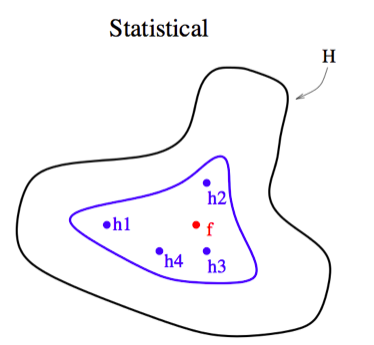

In [2]:
Image(filename='../assets/images/statistical.png') 

---

A bagging ensemble model, for example, mitigates this problem by "averaging out" base classifier predictions to improve convergence on the true function.

[Paper describing in-depth reason for this.](http://web.cs.iastate.edu/~jtian/cs573/Papers/Dietterich-ensemble-00.pdf)

### Computational problem

There is sufficient training data, **but it is computationally intractable to find the best model $h()$.**

For example, if a base classifier is a decision tree, an exhaustive search of the hypothesis space of all possible classifiers is extremely complex (NP-complete).

This is in fact why decision trees use heuristic algorithms at nodes (greedy search).

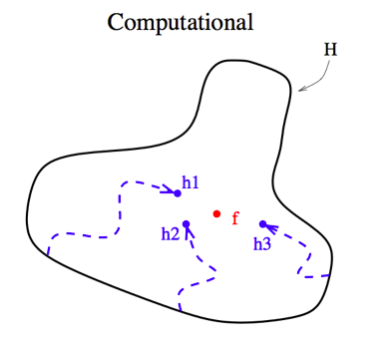

In [3]:
Image(filename='../assets/images/computational.png') 

---

Ensembles composed of several, simpler base models using different starting points can converge faster to a good approximation of $f()$.

### Representational problem

Suppose we use a decision tree as a base classifier. A decision tree works by forming a "rectilinear" partition of the feature space, **i.e it always cuts at a fixed value along a feature.**

But what if $f()$ is best modeled by diagonal line?

It cannot be represented by _a finite number of_ rectilinear segments, and the true decision boundary cannot be obtained by the decision tree classifier.

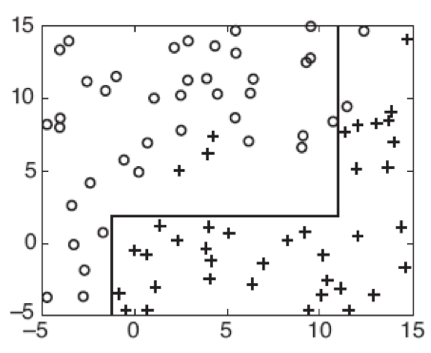

In [7]:
Image(filename='../assets/images/dtcut.png') 

**A representational problem occurs when $f()$ cannot be expressed in terms of our hypothesis at all.** 

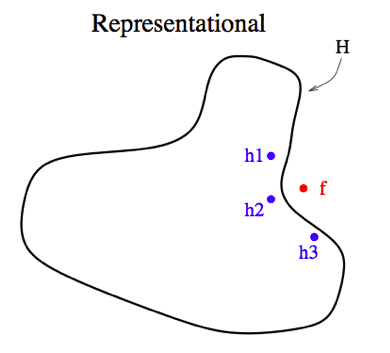

In [6]:
Image(filename='../assets/images/representational.png') 

---

Interestingly, it may be still be possible to approximate $f()$ by expanding the space of representable functions using ensemble methods!

## Conditions for ensembles to outperform base models

For an ensemble method to perform better than a base classifier, it must meet these two criteria:

1. **Accuracy:** the combination of base classifiers must outperform random guessing. 
2. **Diversity:** base models must not be identical in classification/regression estimates.
    - [Description of diversity.](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume11/opitz99a-html/node2.html)
    - [Paper on measures of diversity.](http://staff.ustc.edu.cn/~ketang/papers/TangSuganYao_ML06.pdf)

## Bagging

The ensemble method we will be using today is called **bagging**, which is short for **bootstrap aggregating**.

Bagging builds multiple base models with **resampled training data with replacement.** We train $k$ base classifiers on $k$ different samples of training data. Using random subsets of the data to train base models promotes more differenes between the base models.

Random Forests, which "bag" decision trees, typically achieve very high classification accuracy.

## Bagging's magic decrease in bias-variance tradeoff

One of the biggest (and craziest) advantages of Random Forests is that they **decrease variance without increasing bias**. Essentially you can get a better model without having to trade off between bias and variance.

---

**VARIANCE DECREASE**

Base model estimates are averaged together, so _variability of model predictions (across hypothetical samples) is lower._

---

**NO/LOW BIAS INCREASE**

The bias remains the same as the bias of the individual base models. _The model is still able to fit the training data across samples closely due to the complexity of the base models (low bias)._
